In [1]:
from myAE import Manager
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

/home/secondvoca/anaconda3/envs/torch/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
manager = Manager()
manager.prepare_data()

def calc_loss(model, x, y, F, device):
    h = model.get_submodule("encoder")(x)
    mu = h[:, :2]
    log_sigma = h[:, 2:4]
    sigma = log_sigma.exp()
    z = torch.rand_like(mu, device=device) * sigma + mu
    pred = model.get_submodule("decoder")(z)
    kl = 0.5*(mu.square() + sigma.square() - log_sigma - 1).sum(dim=1).mean()
    ll = F.binary_cross_entropy(pred, x, reduction='sum')/len(x)
    loss = ll + kl
    return loss

manager.set_default_model(4, 2)

In [3]:
def show_ten_images(ori_imgs, pred_imgs):
    tmp = torch.zeros(28 * 2, 28 * 10)

    for idx, img in enumerate(ori_imgs):
        tmp[:28, idx * 28: (idx + 1) * 28] = img.view(28, 28)
    
    for idx, img in enumerate(pred_imgs):
        tmp[28:28 * 2, idx * 28: (idx + 1) * 28] = img.view(28, 28)

    plt.figure(figsize=(20, 6))
    plt.imshow(tmp, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

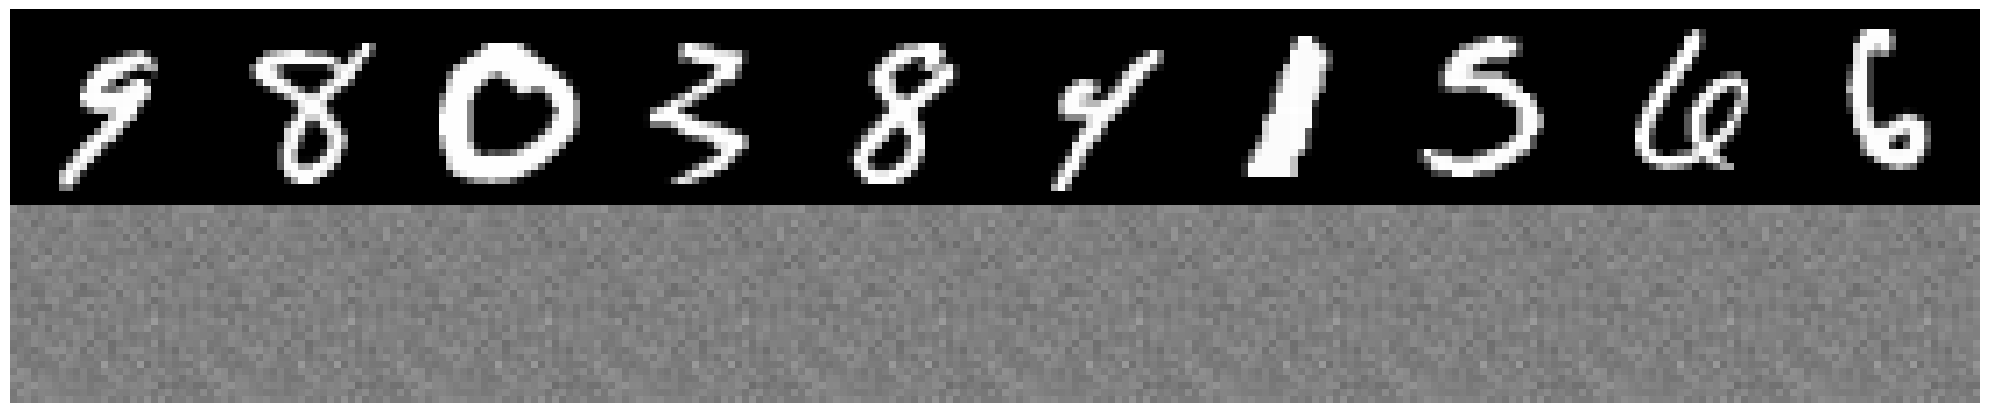

In [4]:
manager.model.to('cpu')
for x, y in manager.train_dataloader:
    with torch.no_grad():
        ori_imgs = x[:10]
        h = manager.model.get_submodule("encoder")(ori_imgs)
        mu = h[:, :2]
        pred = manager.model.get_submodule("decoder")(mu)
        show_ten_images(ori_imgs, pred)
    break

- 이상치를 판단할 때 Dkl을 포함시켜야 하나?
    - 메니폴드에서 먼 지점을 이상치라고 판단해야 하므로 

- 왜 거리가 0을 중심으로 한 정규분포 모양이 아닌가?
    - 먼저 0인 샘플이 하나도 없는 까닭은 무엇일까?

- 비슷한 거리에 있는 샘플들의 모임이 어떤 모델에 의해 더 쉽게 배워질 거라는 논리는 

In [5]:
def calc_loss_ll(model, x, F):
    h = model.get_submodule("encoder")(x)
    mu = h[:, :2]
    pred = model.get_submodule("decoder")(mu)
    ll = F.binary_cross_entropy(pred, x, reduction='none')
    ll = ll.sum(dim=[1, 2, 3])
    return ll

In [27]:
60000 * 0.01

600.0

In [6]:
for _ in range(247):
    _ = manager.train_on_cpu(calc_loss, epochs=1)
    manager.reset_dataloader_removing_outliers(calc_loss_ll, removing_portion=0.01)

Now, it is working on cpu.


100%|██████████| 1/1 [00:12<00:00, 12.97s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:07<00:00,  7.97s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:07<00:00,  7.75s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:07<00:00,  7.86s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:07<00:00,  7.68s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:07<00:00,  7.53s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:07<00:00,  7.56s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:07<00:00,  7.36s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:07<00:00,  7.36s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:07<00:00,  7.34s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:07<00:00,  7.22s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:07<00:00,  7.33s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:07<00:00,  7.20s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:07<00:00,  7.06s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:06<00:00,  6.99s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:07<00:00,  7.03s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:06<00:00,  6.85s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:06<00:00,  6.79s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:06<00:00,  6.81s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:06<00:00,  6.71s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:06<00:00,  6.61s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:06<00:00,  6.57s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:06<00:00,  6.48s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:06<00:00,  6.32s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:06<00:00,  6.40s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:06<00:00,  6.28s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:06<00:00,  6.18s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:06<00:00,  6.15s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:06<00:00,  6.01s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:06<00:00,  6.13s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:05<00:00,  5.95s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:05<00:00,  5.83s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:05<00:00,  5.84s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:05<00:00,  5.78s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:05<00:00,  5.69s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:05<00:00,  5.69s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:05<00:00,  5.65s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:05<00:00,  5.67s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:05<00:00,  5.68s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:05<00:00,  5.40s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:05<00:00,  5.36s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:05<00:00,  5.26s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:05<00:00,  5.06s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:05<00:00,  5.95s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:05<00:00,  5.20s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:05<00:00,  5.09s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:05<00:00,  5.02s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:05<00:00,  5.01s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.90s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.81s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.96s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.77s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.81s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.71s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.67s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.58s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.65s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.53s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.47s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.56s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.30s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.36s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.24s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.24s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.21s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.27s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.09s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.17s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.13s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.11s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:04<00:00,  4.08s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.95s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.93s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.85s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.90s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.89s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.80s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.81s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.60s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.61s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.67s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.60s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.54s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.52s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.49s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.54s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.40s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.35s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.43s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.27s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.23s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.22s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.15s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.20s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.20s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.06s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.10s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.04s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.01s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.03s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.93s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:03<00:00,  3.01s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.89s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.90s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.80s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.78s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.82s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.72s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.80s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.66s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.63s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.49s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.56s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.44s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.40s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.41s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.33s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.30s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.31s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.28s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.12s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.02s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  2.00s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.94s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:02<00:00,  2.03s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.89s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.91s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.72s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.65s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.62s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.68s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.54s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.49s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.47s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.46s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.39s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.37s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.22s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.22s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.25s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.20s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.17s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.20s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.19s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.15s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.17s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.14s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.03s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.00s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.04it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.04it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:01<00:00,  1.05s/it]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.15it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.42it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.40it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.44it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.47it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.51it/s]


Now, it is working on cpu.


100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


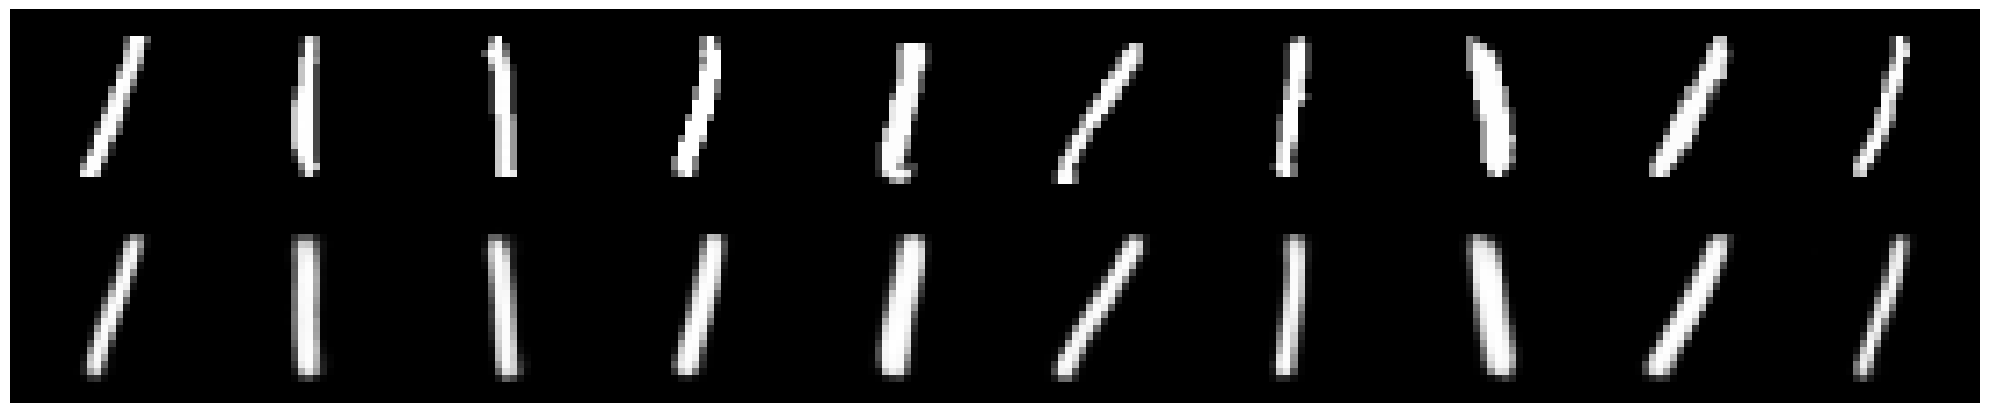

In [55]:
manager.model.to('cpu')
for x, y in manager.train_dataloader:
    with torch.no_grad():
        ori_imgs = x[:10]
        h = manager.model.get_submodule("encoder")(ori_imgs)
        mu = h[:, :2]
        pred = manager.model.get_submodule("decoder")(mu)
        show_ten_images(ori_imgs, pred)
    break

4967


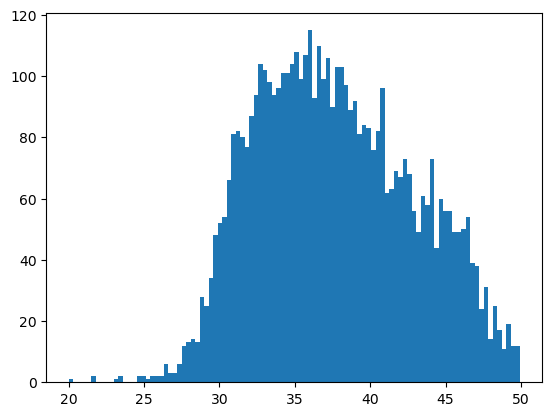

In [36]:
with torch.no_grad():
    h = manager.model.get_submodule("encoder")(manager.training_data)
    mu = h[:, :2]
    pred = manager.model.get_submodule("decoder")(mu)
    ll = F.binary_cross_entropy(pred, manager.training_data, reduction='none')
    ll = ll.sum(dim=[1, 2, 3])

print(len(ll))
plt.hist(ll, bins=100)
plt.show()

- 로스를 관찰했을 때 두 개의 모드가 보이는데,
- 그 두 부분을 중심으로 5000 개씩 뽑았을 때 원본의 메니폴드와 얼마나 닮고
- 재생하는 데이터가 얼마나 깨끗한가?

60000


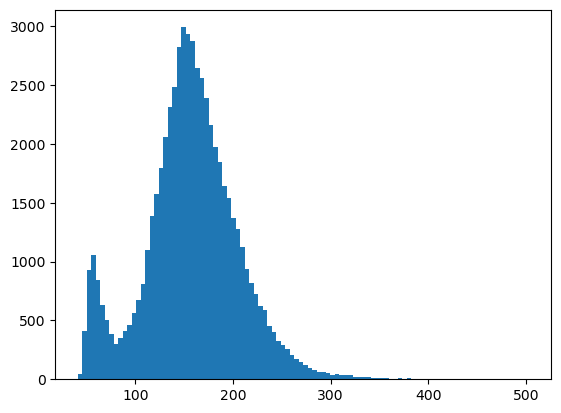

In [6]:
manager.model.to('cpu')

with torch.no_grad():
    h = manager.model.get_submodule("encoder")(manager.training_data)
    mu = h[:, :2]
    pred = manager.model.get_submodule("decoder")(mu)
    ll = F.binary_cross_entropy(pred, manager.training_data, reduction='none')
    ll = ll.sum(dim=[1, 2, 3])

print(len(ll))
plt.hist(ll, bins=100)
plt.show()

In [28]:
num = 60000
ratio = 0.01
count = 0
while num > 5000:
    num = int(num * (1 - ratio))
    count += 1
print(num, count)

4967 247


Now, it is working on cuda:0.


100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


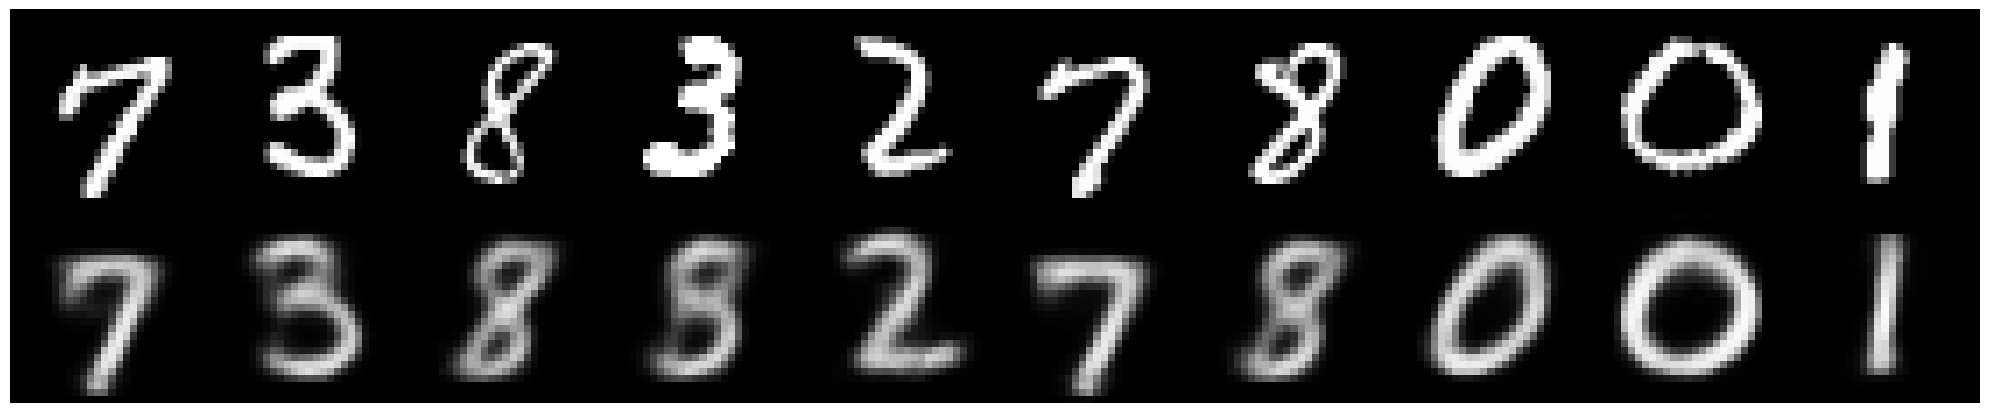

In [9]:
hist = manager.train(calc_loss, epochs=1)
manager.model.to('cpu')
for x, y in manager.train_dataloader:
    with torch.no_grad():
        ori_imgs = x[:10]
        h = manager.model.get_submodule("encoder")(ori_imgs)
        mu = h[:, :2]
        pred = manager.model.get_submodule("decoder")(mu)
        show_ten_images(ori_imgs, pred)
    break

40000


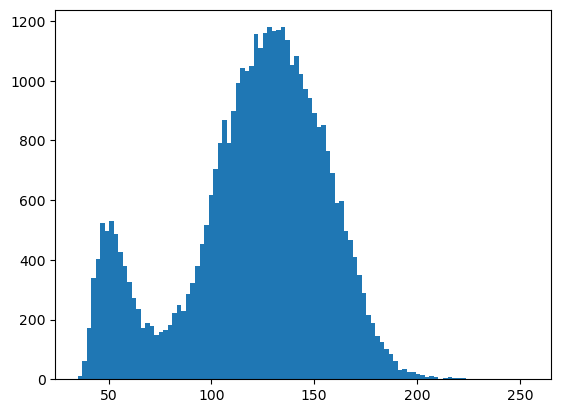

In [10]:
manager.model.to('cpu')

with torch.no_grad():
    h = manager.model.get_submodule("encoder")(manager.training_data)
    mu = h[:, :2]
    pred = manager.model.get_submodule("decoder")(mu)
    ll = F.binary_cross_entropy(pred, manager.training_data, reduction='none')
    ll = ll.sum(dim=[1, 2, 3])

print(len(ll))
plt.hist(ll, bins=100)
plt.show()

Now, it is working on cuda:0.


100%|██████████| 1/1 [00:01<00:00,  1.78s/it]


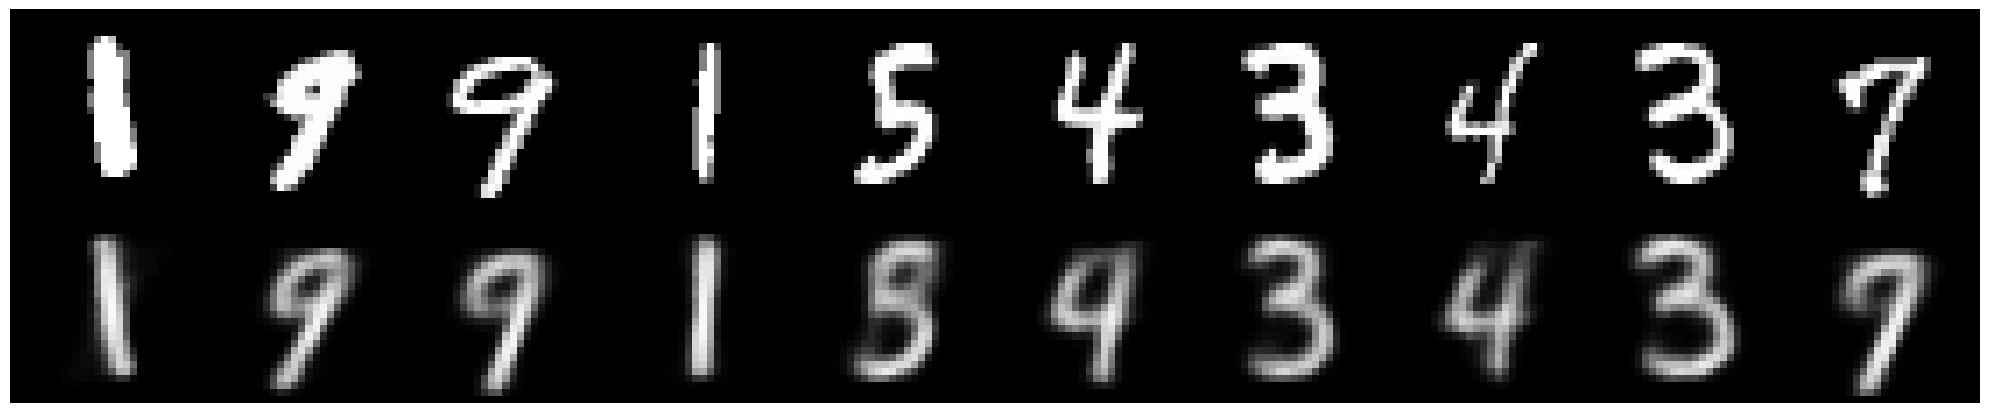

In [11]:
manager.reset_dataloader_removing_outliers(calc_loss_ll)
hist = manager.train(calc_loss, epochs=1)
manager.model.to('cpu')
for x, y in manager.train_dataloader:
    with torch.no_grad():
        ori_imgs = x[:10]
        h = manager.model.get_submodule("encoder")(ori_imgs)
        mu = h[:, :2]
        pred = manager.model.get_submodule("decoder")(mu)
        show_ten_images(ori_imgs, pred)
    break

26666


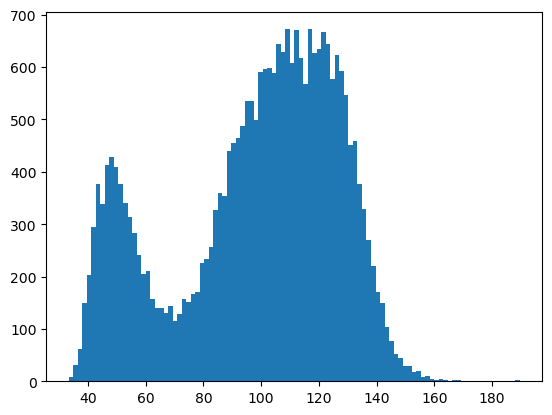

In [12]:
manager.model.to('cpu')

with torch.no_grad():
    h = manager.model.get_submodule("encoder")(manager.training_data)
    mu = h[:, :2]
    pred = manager.model.get_submodule("decoder")(mu)
    ll = F.binary_cross_entropy(pred, manager.training_data, reduction='none')
    ll = ll.sum(dim=[1, 2, 3])

print(len(ll))
plt.hist(ll, bins=100)
plt.show()

Now, it is working on cuda:0.


100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


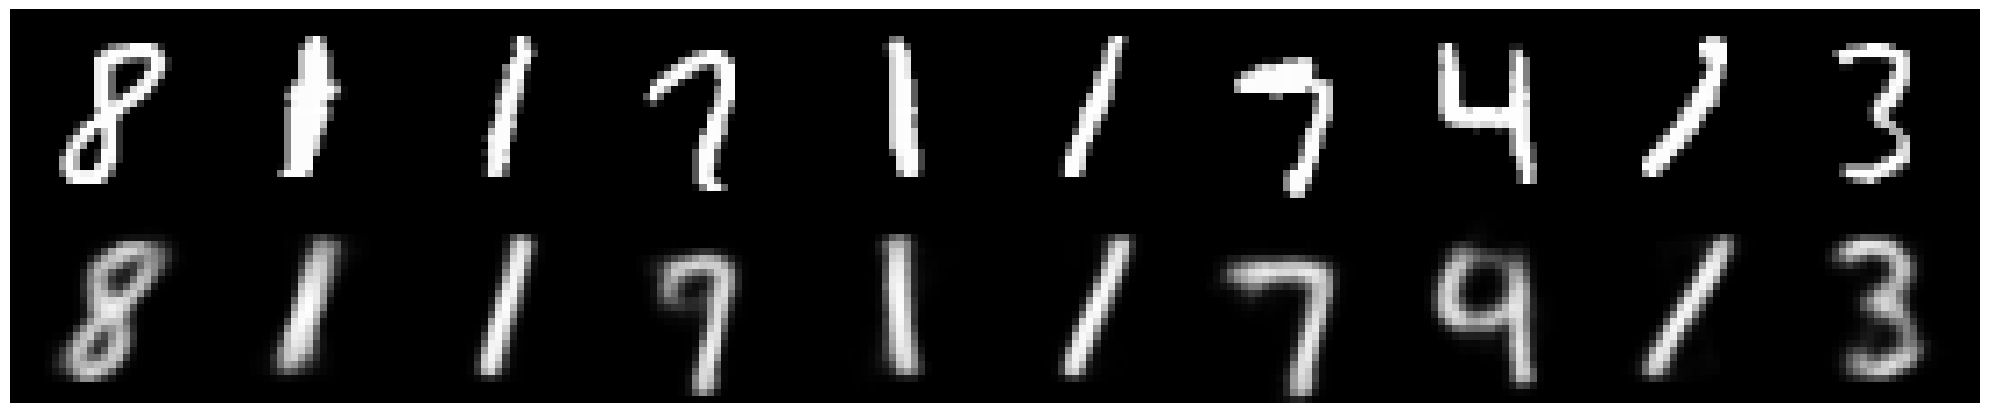

In [13]:
manager.reset_dataloader_removing_outliers(calc_loss_ll)
hist = manager.train(calc_loss, epochs=1)
manager.model.to('cpu')
for x, y in manager.train_dataloader:
    with torch.no_grad():
        ori_imgs = x[:10]
        h = manager.model.get_submodule("encoder")(ori_imgs)
        mu = h[:, :2]
        pred = manager.model.get_submodule("decoder")(mu)
        show_ten_images(ori_imgs, pred)
    break

17777


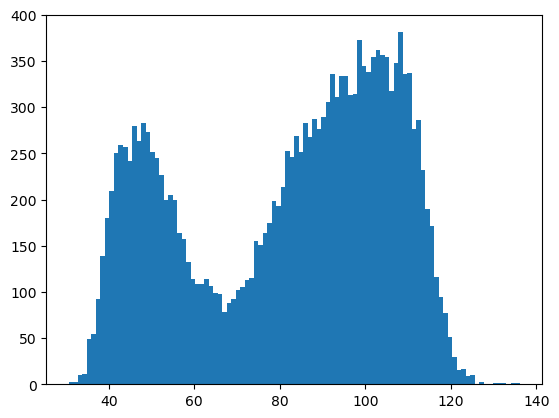

In [14]:
manager.model.to('cpu')

with torch.no_grad():
    h = manager.model.get_submodule("encoder")(manager.training_data)
    mu = h[:, :2]
    pred = manager.model.get_submodule("decoder")(mu)
    ll = F.binary_cross_entropy(pred, manager.training_data, reduction='none')
    ll = ll.sum(dim=[1, 2, 3])

print(len(ll))
plt.hist(ll, bins=100)
plt.show()

Now, it is working on cuda:0.


100%|██████████| 1/1 [00:00<00:00,  1.52it/s]


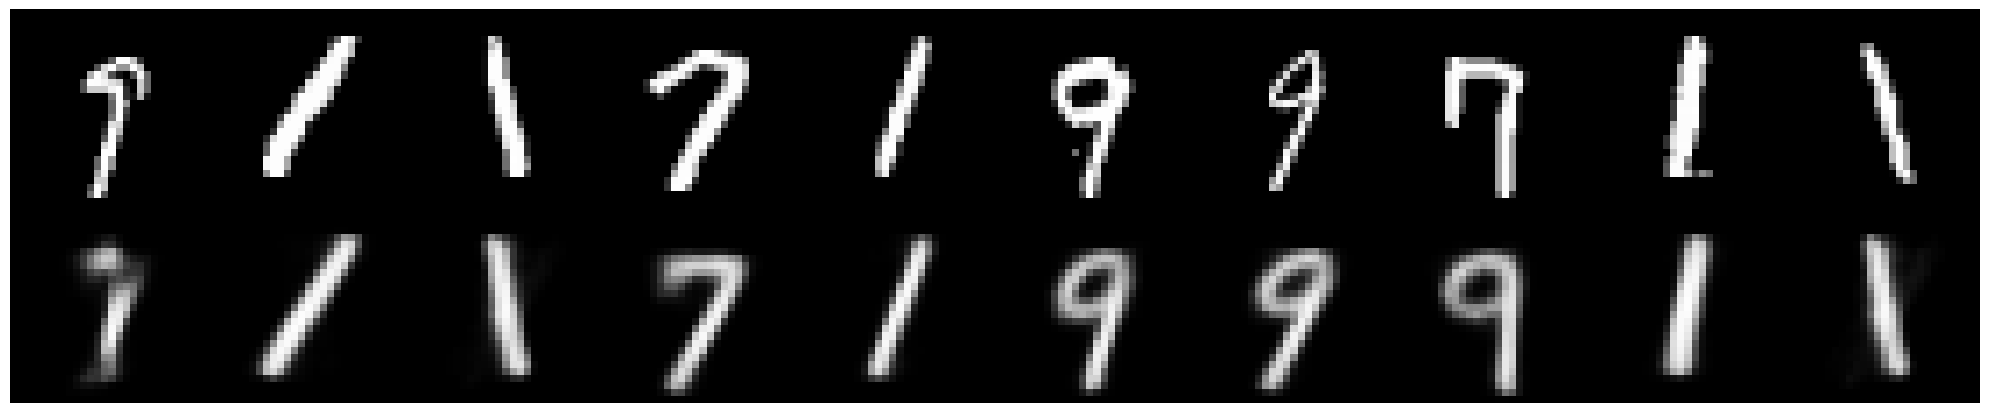

In [15]:
manager.reset_dataloader_removing_outliers(calc_loss_ll)
hist = manager.train(calc_loss, epochs=1)
manager.model.to('cpu')
for x, y in manager.train_dataloader:
    with torch.no_grad():
        ori_imgs = x[:10]
        h = manager.model.get_submodule("encoder")(ori_imgs)
        mu = h[:, :2]
        pred = manager.model.get_submodule("decoder")(mu)
        show_ten_images(ori_imgs, pred)
    break

11851


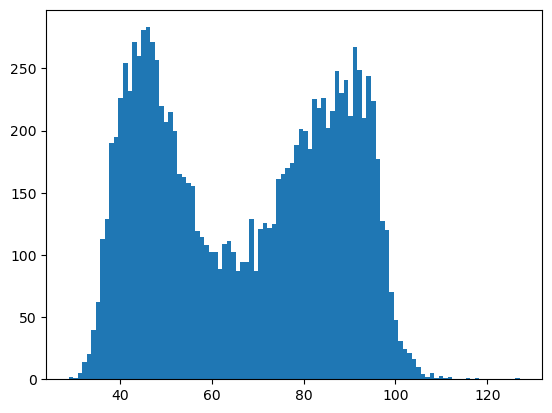

In [16]:
manager.model.to('cpu')

with torch.no_grad():
    h = manager.model.get_submodule("encoder")(manager.training_data)
    mu = h[:, :2]
    pred = manager.model.get_submodule("decoder")(mu)
    ll = F.binary_cross_entropy(pred, manager.training_data, reduction='none')
    ll = ll.sum(dim=[1, 2, 3])

print(len(ll))
plt.hist(ll, bins=100)
plt.show()

Now, it is working on cuda:0.


100%|██████████| 1/1 [00:00<00:00,  2.29it/s]


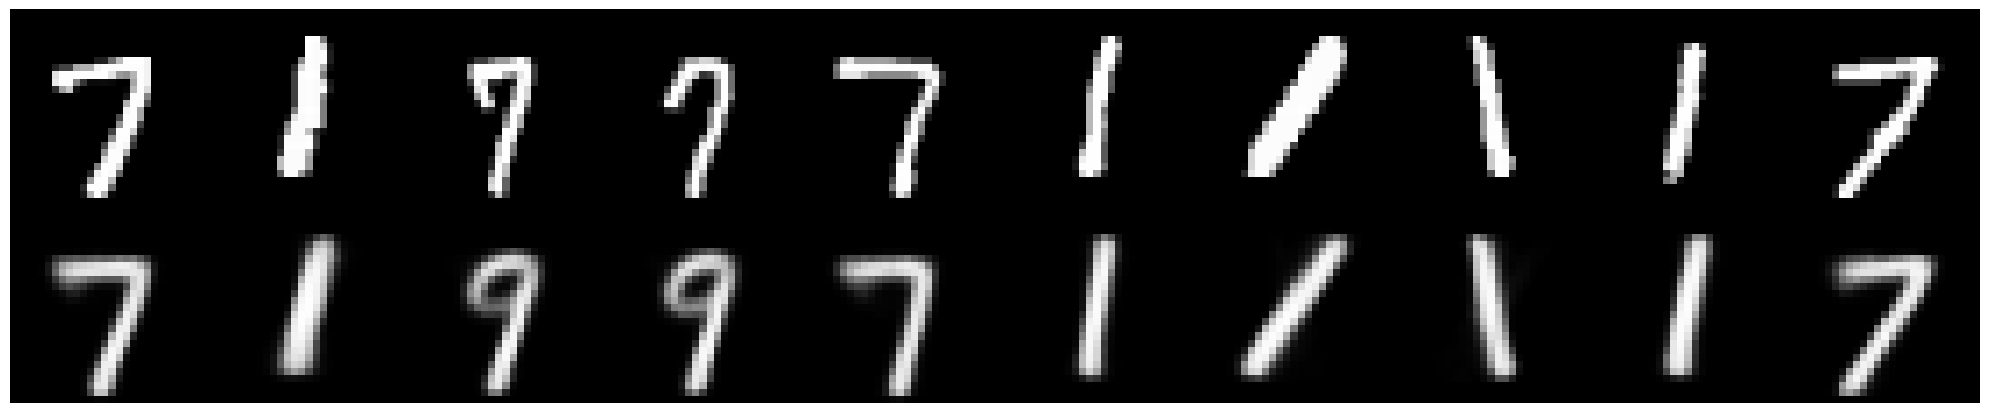

In [17]:
manager.reset_dataloader_removing_outliers(calc_loss_ll)
hist = manager.train(calc_loss, epochs=1)
manager.model.to('cpu')
for x, y in manager.train_dataloader:
    with torch.no_grad():
        ori_imgs = x[:10]
        h = manager.model.get_submodule("encoder")(ori_imgs)
        mu = h[:, :2]
        pred = manager.model.get_submodule("decoder")(mu)
        show_ten_images(ori_imgs, pred)
    break

7900


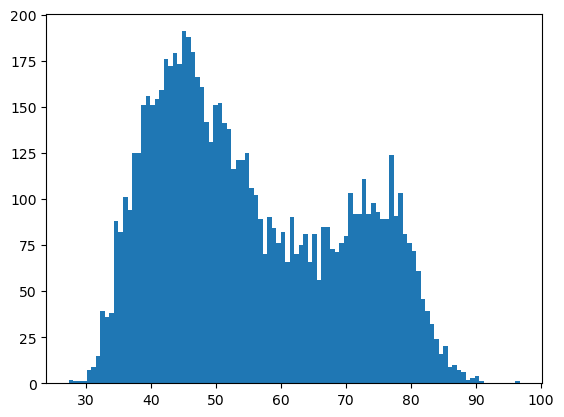

In [18]:
manager.model.to('cpu')

with torch.no_grad():
    h = manager.model.get_submodule("encoder")(manager.training_data)
    mu = h[:, :2]
    pred = manager.model.get_submodule("decoder")(mu)
    ll = F.binary_cross_entropy(pred, manager.training_data, reduction='none')
    ll = ll.sum(dim=[1, 2, 3])

print(len(ll))
plt.hist(ll, bins=100)
plt.show()

Now, it is working on cuda:0.


100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


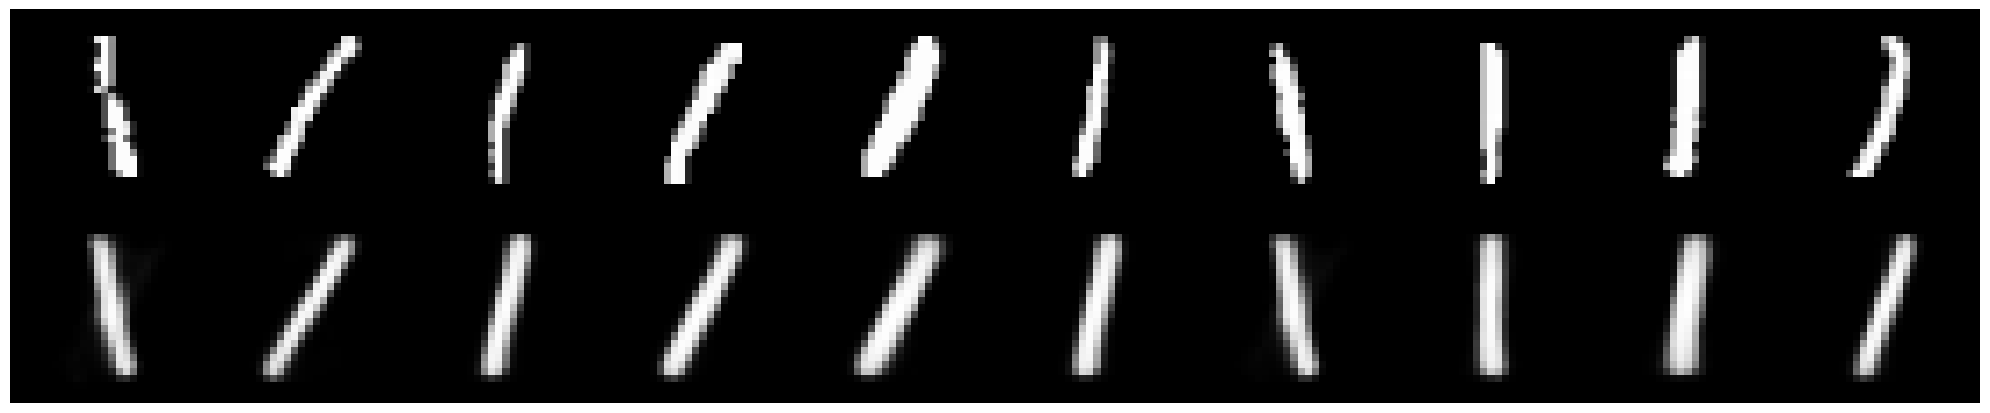

In [19]:
manager.reset_dataloader_removing_outliers(calc_loss_ll)
hist = manager.train(calc_loss, epochs=1)
manager.model.to('cpu')
for x, y in manager.train_dataloader:
    with torch.no_grad():
        ori_imgs = x[:10]
        h = manager.model.get_submodule("encoder")(ori_imgs)
        mu = h[:, :2]
        pred = manager.model.get_submodule("decoder")(mu)
        show_ten_images(ori_imgs, pred)
    break

5266


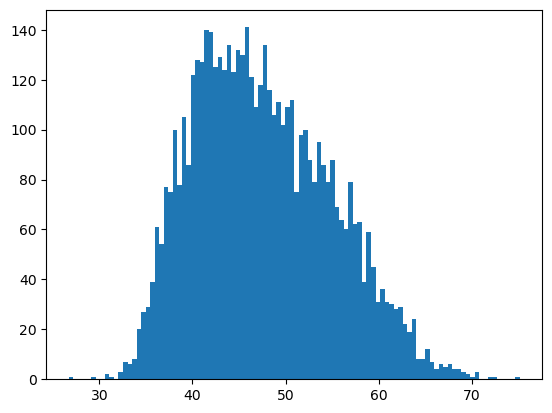

In [20]:
manager.model.to('cpu')

with torch.no_grad():
    h = manager.model.get_submodule("encoder")(manager.training_data)
    mu = h[:, :2]
    pred = manager.model.get_submodule("decoder")(mu)
    ll = F.binary_cross_entropy(pred, manager.training_data, reduction='none')
    ll = ll.sum(dim=[1, 2, 3])

print(len(ll))
plt.hist(ll, bins=100)
plt.show()

Now, it is working on cuda:0.


100%|██████████| 1/1 [00:00<00:00,  5.93it/s]


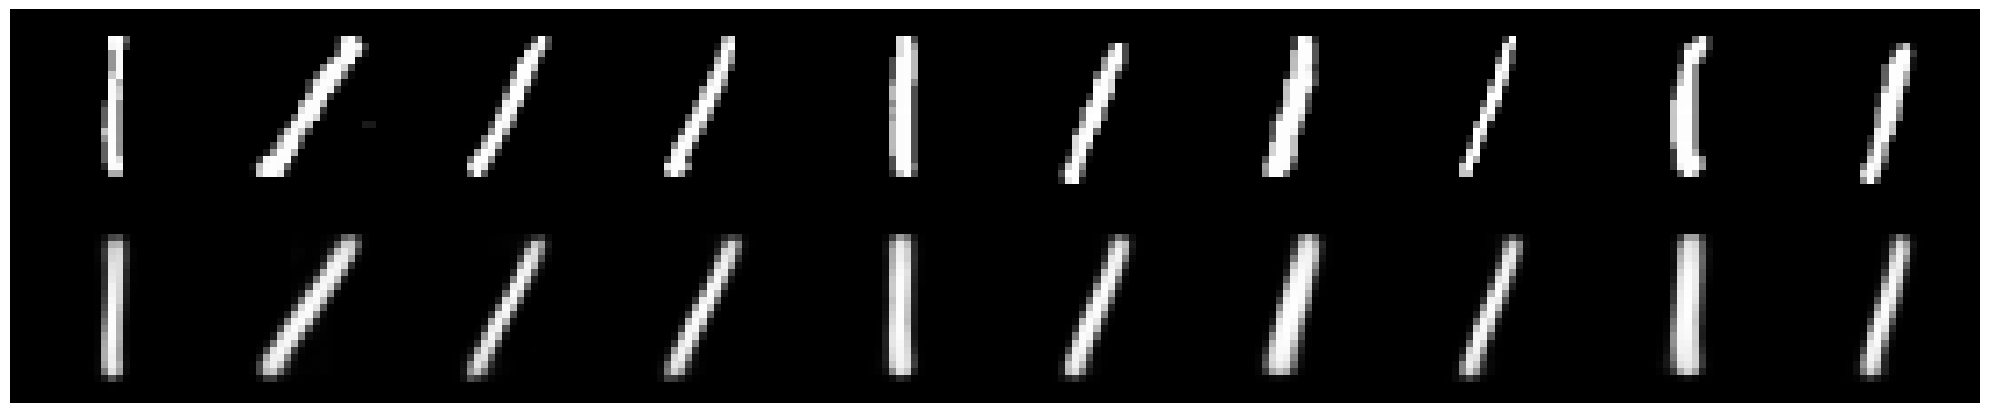

In [21]:
manager.reset_dataloader_removing_outliers(calc_loss_ll)
hist = manager.train(calc_loss, epochs=1)
manager.model.to('cpu')
for x, y in manager.train_dataloader:
    with torch.no_grad():
        ori_imgs = x[:10]
        h = manager.model.get_submodule("encoder")(ori_imgs)
        mu = h[:, :2]
        pred = manager.model.get_submodule("decoder")(mu)
        show_ten_images(ori_imgs, pred)
    break

3510


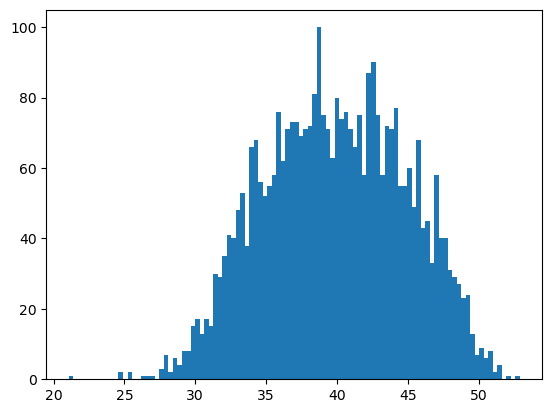

In [22]:
manager.model.to('cpu')

with torch.no_grad():
    h = manager.model.get_submodule("encoder")(manager.training_data)
    mu = h[:, :2]
    pred = manager.model.get_submodule("decoder")(mu)
    ll = F.binary_cross_entropy(pred, manager.training_data, reduction='none')
    ll = ll.sum(dim=[1, 2, 3])

print(len(ll))
plt.hist(ll, bins=100)
plt.show()